# Divine Comedy Generation

In order to showcase our project results here a demo to run our main script "generete_dante.py" and see our Canto printed out with all the requirements needed as:
- terzine structure 
- hendecasyllable verse
- rhyme scheme

In [5]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

from dante_by_tonedrev_syl.data_preparation import text_in_rev_syls, text_in_syls_rhyme
from dante_by_tonedrev_syl.text_processing import prettify_text, special_tokens, remove_punctuation
from dante_by_tonedrev_syl.generate_dante import generate_text
from utils import save_vocab, load_vocab, save_syls_list, load_syls_list

working_dir = os.path.join(os.path.abspath('..'), 'dante_by_tonedrev_syl')


### Loading the rhyme and verse vocabularies

In [6]:
logs_dir = os.path.join(working_dir, 'logs')
os.makedirs(logs_dir, exist_ok = True) 
vocab_file_rhyme = os.path.join(logs_dir, 'vocab_rhyme.json')
vocab_file_verse = os.path.join(logs_dir,  'vocab_verse.json')

vocab_rhyme, idx2syl_rhyme, syl2idx_rhyme = load_vocab(vocab_file_rhyme)
vocab_verse, idx2syl_verse, syl2idx_verse = load_vocab(vocab_file_verse)

vocab_size_rhyme = len(vocab_rhyme)
vocab_size_verse = len(vocab_verse)


### Loading the rhyme and verse models already trained

In [7]:
models_dir = os.path.join(working_dir, 'models')
os.makedirs(models_dir, exist_ok = True) 
model_file_verse = os.path.join(models_dir, "dante_by_tonedrev_syl_verse_model.h5")
model_file_rhyme = os.path.join(models_dir, "dante_by_tonedrev_syl_rhyme_model.h5")

model_verse = tf.keras.models.load_model(model_file_verse)
model_rhyme = tf.keras.models.load_model(model_file_rhyme)


### Models summary

In [8]:
# model_rhyme.summary()
# print('\n')
# model_verse.summary()

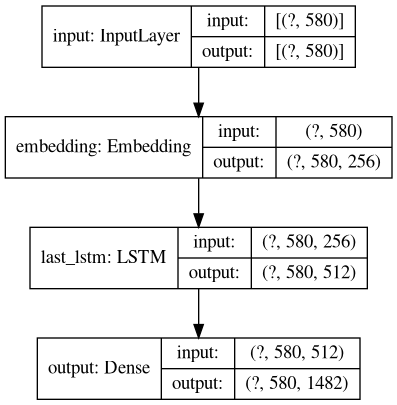

In [9]:
tf.keras.utils.plot_model(model_rhyme,  to_file='/tmp/model_rhyme.png', show_shapes=True, show_layer_names=True)

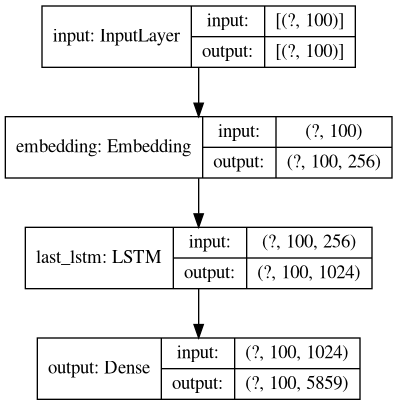

In [10]:
tf.keras.utils.plot_model(model_verse, to_file='/tmp/model_verse.png', show_shapes=True, show_layer_names=True)

### Loading sequence of rhyme to build the start sequence for starting generation

In [11]:
SEQ_LENGTH_RHYME = model_rhyme.get_layer('embedding').output.shape[1]

text_in_syls_rhyme_file = os.path.join(working_dir, 'text_in_syls_rhyme.json')

if os.path.isfile(text_in_syls_rhyme_file):
    syls_rhyme_list = load_syls_list(text_in_syls_rhyme_file)
else:
    syls_rhyme_list = text_in_syls_rhyme(divine_comedy)
    save_syls_list(syls_rhyme_list, text_in_syls_rhyme_file)

# syls_rhyme_list = text_in_syls_rhyme(divine_comedy)

#index_eoc = syls_rhyme_list.index(special_tokens['END_OF_CANTO']) + 1
indexes = [i for i, x in enumerate(syls_rhyme_list) if x == special_tokens['END_OF_CANTO'] and i > SEQ_LENGTH_RHYME]
index_eoc = np.random.choice(indexes) + 1
start_idx = max(0, index_eoc - SEQ_LENGTH_RHYME)
start_seq_rhyme = syls_rhyme_list[start_idx:index_eoc]

### Loading sequence of verse to build the start sequence for starting generation

In [9]:
SEQ_LENGTH_VERSE = model_verse.get_layer('embedding').output.shape[1]

text_in_syls_verse_file = os.path.join(working_dir, 'text_in_syls_verse.json')

if os.path.isfile(text_in_syls_verse_file):
    syls_verse_list = load_syls_list(text_in_syls_verse_file)
else:
    syls_verse_list = text_in_rev_syls(divine_comedy)
    save_syls_list(syls_verse_list, text_in_syls_verse_file)

# syls_verse_list = text_in_rev_syls(divine_comedy)

indexes = [i for i, x in enumerate(syls_verse_list) if x == special_tokens['END_OF_VERSO'] and i > SEQ_LENGTH_VERSE]
index_eov = np.random.choice(indexes)
start_idx = max(0, index_eov - SEQ_LENGTH_VERSE)
start_seq_verse = syls_verse_list[start_idx:index_eov]

### Generating the new text

In [12]:
generated_text, generated_text_no_tone = generate_text(model_rhyme, model_verse, special_tokens, vocab_size_rhyme, vocab_size_verse, syl2idx_rhyme, idx2syl_rhyme, syl2idx_verse, idx2syl_verse, SEQ_LENGTH_RHYME, SEQ_LENGTH_VERSE, start_seq_rhyme, start_seq_verse, temperature=1.0)

NameError: name 'SEQ_LENGTH_VERSE' is not defined

In [ ]:
# generated_canto_file = os.path.join('..', "generated_cantos", "generated_canto.txt")
# with open(generated_canto_file,"w") as f:
#     f.write(prettify_text(generated_text_no_tone, special_tokens))

## EVALUATION

In [11]:
#import
import os
import sys
sys.path.append(os.path.join('..', 'other_metrics') )
import other_metrics.metrics as om
from other_metrics.ngrams_plagiarism import ngrams_plagiarism

import our_metrics.metrics as m
from dante_by_rev_syl.text_processing import clean_comedy
from evaluate_metrics import evaluate_other_metrics, evaluate_our_metrics

In [12]:
#generated canto
generated_canto_file = os.path.join('..', "generated_cantos", "generated_canto.txt")
with open(generated_canto_file,"r", encoding='utf-8') as f:
    generated_canto = f.read()

#divine comedy
divine_comedy_file = os.path.join('..', "divina_commedia", "divina_commedia_accent_UTF-8.txt") 
with open(divine_comedy_file,"r", encoding='utf-8') as f:
    divine_comedy = f.read()

divine_comedy = clean_comedy(divine_comedy, special_tokens)
divine_comedy = prettify_text(divine_comedy, special_tokens)
divine_comedy = remove_punctuation(divine_comedy)

evaluation_results = {}

In [13]:
print(generated_canto)

CANTO
un altro ché non credi tu paventi
licito poeta de la tua fame
dirò de s'appiattò miser li denti

qual era cacciator per tutte brame
raggio diè dito e poi vedea temendo
ingiusto fece di quelli a gran dame

che solo il mio il qual io riprendo
chercuti a la luce foglia sospinto
perché questi ciascun lor maggior temendo

molto temprando per l'aere dipinto
viso pelato che tagne ed ello
su la fiumana ove 'l mar non distinto

contente furon d'acqua e danïello
a la voce che ciò l'accende d'ira
e io maestro disdegnoso e fello

io anime nomota e tira
corso ch'io ferna a e altra cura
io dico come sotto mi spira

onde nel novo di fresca verdura
poscia ch'io dico non d'altro cagione
io vive e sente e sé stesso misura

come 'n peschiera che furon cagione
che due figli a riveder le stelle
così fer molti antichi di guittone

cominciò 'l duca mio che mi favelle
or voi digi la mente ma di pria
regolar da l'altra già m'avea felle

com' io vidi che richesto più s'india
e tante fissi e a mente giovan

In [14]:
## Evaluation other metrics on generated canto ### 
print('\nEVALUATING OTHER METRICS ON GENERATED CANTO...')
evaluation_results = evaluate_other_metrics(generated_canto, divine_comedy)

print('\nOTHER METRICS ON GENERATED CANTO:')
for k, v in evaluation_results.items():
    print('{}: {}'.format(k, v)) 

##################################################

### Evaluation our metrics on generated canto ####
print('\nEVALUATING OUR METRICS ON GENERATED CANTO...')
evaluation_results = evaluate_our_metrics(generated_canto)

print('\nOUR METRICS ON GENERATED CANTO:')
for k, v in evaluation_results.items():
    print('{}: {}'.format(k, v))

##################################################


EVALUATING OTHER METRICS ON GENERATED CANTO...

OTHER METRICS ON GENERATED CANTO:
Number of putative terzine: 41
Number of well formed terzine: 41
Average structuredness: 0.9940119760479041
Average hendecasyllabicness: 0.9246119733924609
Average rhymeness: 1.0
Plagiarism: 0.8502857142857143

EVALUATING OUR METRICS ON GENERATED CANTO...

OUR METRICS ON GENERATED CANTO:
Number of verses: 124
Number of strophes: 42
Number of well formed terzine: 41
Last single verse: True
Average syllables per verse: 11.12 ± 0.53
Hendecasyllabicness score: 0.7661
Rhymeness score: 0.9365


In [15]:
# # Test our metrics on one canto of divine comedy #
# n_canto = 1
# print('\nEVALUATING OUR METRICS ON {} CANTO OF DIVINE COMEDY...'.format(n_canto))
# divine_comedy_canto_list = divine_comedy.split('CANTO')
# divine_comedy_canto_list = [line.strip() for line in divine_comedy_canto_list if line != '']

# evaluation_results = evaluate_our_metrics(divine_comedy_canto_list[n_canto-1])

# print('\nOUR METRICS ON {} CANTO OF DIVINE COMEDY:'.format(n_canto))
# for k, v in evaluation_results.items():
#     print('{}: {}'.format(k, v))

# ##################################################


###### Test our metrics on divine comedy ########
print('\nEVALUATING OUR METRICS ON WHOLE DIVINE COMEDY...')
evaluation_results = evaluate_our_metrics(divine_comedy)

print('\nOUR METRICS ON WHOLE DIVINE COMEDY:')
for k, v in evaluation_results.items():
    print('{}: {}'.format(k, v))
f.close()
##################################################



EVALUATING OUR METRICS ON WHOLE DIVINE COMEDY...

OUR METRICS ON WHOLE DIVINE COMEDY:
Number of verses: 14233
Number of strophes: 4811
Number of well formed terzine: 4711
Last single verse: True
Average syllables per verse: 11.09 ± 0.40
Hendecasyllabicness score: 0.8833
Rhymeness score: 0.5261


In [16]:
# OUTPUT OF PREVIOUS CELL

# EVALUATING OUR METRICS ON WHOLE DIVINE COMEDY...

# OUR METRICS ON WHOLE DIVINE COMEDY:
# Number of verses: 14233
# Number of strophes: 4811
# Number of well formed terzine: 4711
# Last single verse: True
# Average syllables per verse: 11.09 ± 0.40
# Hendecasyllabicness score: 0.8833
# Rhymeness score: 0.5261